# Building machine learning model to predict Gender

### import graphlab (https://dato.com/products/create/)

In [1]:
import graphlab

In [2]:
# Firstly we removed some unrelevant for predictions features from training and test data:
# we removed V7 as it is closely connected with V4, and we removed V8 as it is closely connected with V5,
# we also removed V3 and V6 as dates are not very representative for prediction of Gender, 
# but we will include the mongth from V2 feature to our predictive variables.

# load training data:
column_type_hints=[str,str,long,long,float,float,float,float,float,float,float,
                   float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
data_train = graphlab.SFrame.read_csv('Train.csv',delimiter = ';',column_type_hints = column_type_hints)

[INFO] 1455641799 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_FILE to C:\Users\user\Anaconda3\envs\dato-env\lib\site-packages\certifi\cacert.pem
1455641799 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_DIR to 
This non-commercial license of GraphLab Create is assigned to raid.arfua@gmail.com and will expire on November 18, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-6224 - Server binary: C:\Users\user\Anaconda3\envs\dato-env\lib\site-packages\graphlab\unity_server.exe - Server log: C:\Users\user\AppData\Local\Temp\graphlab_server_1455641799.log.0
[INFO] GraphLab Server Version: 1.7.1


PROGRESS: Finished parsing file C:\Users\user\Anaconda3\Train.csv
PROGRESS: Parsing completed. Parsed 10862 lines in 0.165229 secs.


In [3]:
# show first 5 rows to see the data
data_train[:5]
# change type of V2 and V6 from string to datetime and covert it to mongths:
data_train['V2'] = data_train['V2'].str_to_datetime("%d-%m-%Y")
data_train['V2'] = data_train['V2'].split_datetime()['X.month']

In [4]:
# Look at very useful summary statistics with build-in function show() (means, summs, etc.)
data_train.show()
# remove columns V12 as it contains too many undentified values:
data_train.remove_column('V12')
print data_train[:5]

Canvas is accessible via web browser at the URL: http://localhost:58610/index.html
Opening Canvas in default web browser.
+-------------------------------+----+------+----+-----------+----------+
|            subs_id            | V2 |  V4  | V5 |     V9    |   V10    |
+-------------------------------+----+------+----+-----------+----------+
| 183721114dab116fbaf2a3204f... | 7  | 3508 | 15 | 0.8529772 |   0.0    |
| fd77444abf14537778af770392... | 3  | 3508 | 15 |  70.04804 | 67.23939 |
| de6302921ac156d0ce43c30236... | 9  | 3508 | 15 |  57.40215 | 67.29078 |
| d4f4cd3e77a3c1f2405726bb71... | 9  | 3508 | 15 |  53.61982 | 46.93018 |
| bd5623f4c1e0e134b33673aff0... | 9  | 515  | 15 |  177.1632 | 200.1843 |
+-------------------------------+----+------+----+-----------+----------+
+-----------+-----------+-----------+-----------+-----------+----------+
|    V11    |    V13    |    V14    |    V15    |    V16    |   V17    |
+-----------+-----------+-----------+-----------+-----------+-----

In [5]:
# load test data and do similar operations as with training set:
column_type_hints = column_type_hints[:-1]
data_test = graphlab.SFrame.read_csv('Test.csv',delimiter = ';',column_type_hints = column_type_hints)
data_test.remove_column('V12')
data_test['V2'] = data_test['V2'].str_to_datetime("%d-%m-%Y")
data_test['V2'] = data_test['V2'].split_datetime()['X.month']

PROGRESS: Finished parsing file C:\Users\user\Anaconda3\Test.csv
PROGRESS: Parsing completed. Parsed 4654 lines in 0.208085 secs.


In [6]:
data_test.show()

Canvas is accessible via web browser at the URL: http://localhost:58610/index.html
Opening Canvas in default web browser.


In [7]:
# create output variable to be a target for the logistic regression:
data_train['output'] = data_train['Gender'] == 'Female'
# it is equal to 1 when Gender is Female, so we will predict the probability that Gender is Female

In [8]:
# clean training data before doing logistic regression:
data_train = data_train.dropna()
data_train.show()


Canvas is accessible via web browser at the URL: http://localhost:58610/index.html
Opening Canvas in default web browser.


In [9]:
# Let's change data in column Gender, so for Female we put 1, and for Male we put 0:
# Let's create fetures excluding the subs_id, Gender, and output as a target
init_features = data_train.column_names()[1:-2]
init_log_model = graphlab.logistic_classifier.create(data_train, l2_penalty=10, l1_penalty=0,
                                                         features=init_features,
                                                         target='output')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Logistic regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 8744
PROGRESS: Number of classes           : 2
PROGRESS: Number of feature columns   : 26
PROGRESS: Number of unpacked features : 26
PROGRESS: Number of coefficients    : 27
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+-------------------+---------------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |
PROGRESS: +-----------+----------+--------------+-------------------+---------------------+
PROGRESS: | 1         | 2        | 1.076955     | 0.614822          | 0.603659            |
PROGRESS: | 2         | 3        | 1.170022     |

In [10]:
# Let's look at our predictions:
predictions = init_log_model.predict(data_test, output_type='probability')
print predictions[:5]

[0.4084626886394339, 0.5710981647857332, 0.5234885927524219, 0.4447092162317524, 0.5912578689768092]


In [11]:
# Let's look at the summary statistics:
init_log_model.get('coefficients').print_rows(num_rows=27)
# we see that coefficients are small
# we see that even with the initial single logistic regression model we get 61% of accuracy, and 0.65 as AUC value:
print init_log_model.evaluate(data_train)

+-------------+-------+-------+--------------------+
|     name    | index | class |       value        |
+-------------+-------+-------+--------------------+
| (intercept) |  None |   1   |  -0.145339051143   |
|      V2     |  None |   1   |  0.00482428477256  |
|      V4     |  None |   1   | 4.61848853146e-09  |
|      V5     |  None |   1   | -0.00193349124294  |
|      V9     |  None |   1   | -0.00258769050546  |
|     V10     |  None |   1   | 2.29593027931e-07  |
|     V11     |  None |   1   | -0.00786281869121  |
|     V13     |  None |   1   |  0.0158768055659   |
|     V14     |  None |   1   | -0.00189081961529  |
|     V15     |  None |   1   | 6.67555632685e-05  |
|     V16     |  None |   1   | 4.16520795838e-05  |
|     V17     |  None |   1   | -0.000625246885374 |
|     V18     |  None |   1   | -0.000122826549067 |
|     V19     |  None |   1   |  0.00427392987462  |
|     V20     |  None |   1   |  -0.0120579206884  |
|     V21     |  None |   1   | 0.000625918555

### now we will try to improve the model choosing the best possible lambda value
### it will be done using K-Fold Cross Validation
### (no need to create test set as 10% of training data, because all the validations will be performed on validation sets, and we want to keep a number of observations as high as possible)

In [12]:
train_valid_shuffled = graphlab.toolkits.cross_validation.shuffle(data_train, random_seed=1)

In [13]:
## this function will return us an average AUC value over all cross-validated models:

import numpy as np
def k_fold_cross_validation(k, l2_penalty, data, output_name, features_list):
    n = len(data)
    AUC_list = list()
    for i in xrange(k):
        start = (n*i)/k
        end = (n*(i+1))/k-1
        valid_set = data[start:end+1]
        train_set = data[:start].append(data[end+1:])
        model = graphlab.logistic_classifier.create(train_set, target = output_name, features = features_list, validation_set = None, l2_penalty=l2_penalty)
        AUC_list.append(model.evaluate(valid_set)['auc'])
        
    return (np.mean(AUC_list))

In [14]:
## now we will gather all the AUCs that we get through cross-validation

mean_AUC = list()
for l2_penalty in np.logspace(-1, 2, num=25):
    my_features = init_features
    AUC = k_fold_cross_validation(10, l2_penalty, train_valid_shuffled, 'output', my_features)
    mean_AUC.append(AUC)


PROGRESS: Logistic regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 8313
PROGRESS: Number of classes           : 2
PROGRESS: Number of feature columns   : 26
PROGRESS: Number of unpacked features : 26
PROGRESS: Number of coefficients    : 27
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+-------------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-accuracy |
PROGRESS: +-----------+----------+--------------+-------------------+
PROGRESS: | 1         | 2        | 0.045032     | 0.614098          |
PROGRESS: | 2         | 3        | 0.067047     | 0.616865          |
PROGRESS: | 3         | 4        | 0.100571     | 0.619271          |
PROGRESS: | 4         | 5        | 0.123088     | 0.619632          |
PROGRESS: +-----------+----------+--------------+-------------------+
PROGRESS: SUCCESS: Optimal s

In [15]:
print 'Average AUCs: ',mean_AUC    
print 'Maximum AUC: ', np.max(mean_AUC)

right_l2_penalty = (np.logspace(-1, 2, num=25))[mean_AUC.index(np.max(mean_AUC))]
print 'Right l2_penalty: ', right_l2_penalty

Average AUCs:  [0.65770024424536766, 0.6577030415874543, 0.65769620523257477, 0.65768936990324056, 0.65766984610793433, 0.65766136086530813, 0.65763921185508489, 0.65764086118373, 0.65765405729803805, 0.65765876083304975, 0.6576618631419322, 0.65770869839088486, 0.65774757472517387, 0.65780003334519954, 0.65784692075882678, 0.65791643742959727, 0.65798799630821014, 0.65806678257893436, 0.65812800548762296, 0.6580262896654282, 0.65783771608715047, 0.65754043588555022, 0.65713836047000529, 0.65650132503819969, 0.65545290514801713]
Maximum AUC:  0.658128005488
Right l2_penalty:  17.7827941004


In [16]:
print (np.logspace(-1, 2, num=25))

[   0.1           0.13335214    0.17782794    0.23713737    0.31622777
    0.4216965     0.56234133    0.74989421    1.            1.33352143
    1.77827941    2.37137371    3.16227766    4.21696503    5.62341325
    7.49894209   10.           13.33521432   17.7827941    23.71373706
   31.6227766    42.16965034   56.23413252   74.98942093  100.        ]


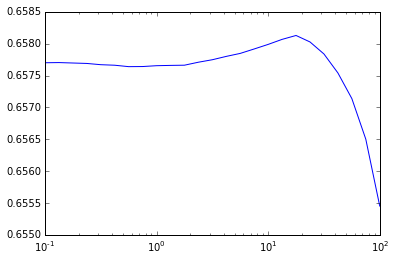

In [17]:
## We can build the graph l2_penalty vs averaged AUC

import matplotlib.pyplot as plt
%matplotlib inline

l2_penaltyv = np.logspace(-1, 2, num=25)
plt.xscale('log')
plt.plot(l2_penaltyv, mean_AUC,'-')

In [18]:
## Finally, we see that, while the difference is not really huge, we can set l2_penalty equal to 18 as the best choice:

final_log_model = graphlab.logistic_classifier.create(train_valid_shuffled, l2_penalty=right_l2_penalty, l1_penalty=0,
                                                         features=init_features,
                                                         target='output')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Logistic regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 8764
PROGRESS: Number of classes           : 2
PROGRESS: Number of feature columns   : 26
PROGRESS: Number of unpacked features : 26
PROGRESS: Number of coefficients    : 27
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+-------------------+---------------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |
PROGRESS: +-----------+----------+--------------+-------------------+---------------------+
PROGRESS: | 1         | 2        | 0.043529     | 0.615586          | 0.601695            |
PROGRESS: | 2         | 3        | 0.069548     |

In [19]:
## Then our evaluations on the same set are 62% accuracy, and ~67% AUC

print final_log_model.evaluate(train_valid_shuffled)

{'f1_score': 0.6107916850950907, 'auc': 0.6654662944132606, 'recall': 0.5681958444764452, 'precision': 0.6602916567057135, 'log_loss': 0.6597055130130905, 'roc_curve': Columns:
	threshold	float
	fpr	float
	tpr	float
	p	int
	n	int

Rows: 100001

Data:
+-----------+-----+-----+------+------+
| threshold | fpr | tpr |  p   |  n   |
+-----------+-----+-----+------+------+
|    0.0    | 1.0 | 1.0 | 4861 | 4375 |
|   1e-05   | 1.0 | 1.0 | 4861 | 4375 |
|   2e-05   | 1.0 | 1.0 | 4861 | 4375 |
|   3e-05   | 1.0 | 1.0 | 4861 | 4375 |
|   4e-05   | 1.0 | 1.0 | 4861 | 4375 |
|   5e-05   | 1.0 | 1.0 | 4861 | 4375 |
|   6e-05   | 1.0 | 1.0 | 4861 | 4375 |
|   7e-05   | 1.0 | 1.0 | 4861 | 4375 |
|   8e-05   | 1.0 | 1.0 | 4861 | 4375 |
|   9e-05   | 1.0 | 1.0 | 4861 | 4375 |
+-----------+-----+-----+------+------+
[100001 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'confusion_matrix': Columns:
	targ

In [20]:
## Now we can make final predictions for the data_test:
final_test_predictions = final_log_model.predict(data_test,output_type='probability')

In [21]:
data_test['output_logistic'] = final_test_predictions

In [22]:
data_test['output_logistic']

dtype: float
Rows: 4654
[0.40924340202054, 0.5704564985694611, 0.5241584569948062, 0.4426642106751946, 0.5869317520084137, 0.45238471935262103, 0.5148055719530626, 0.40595612606008913, 0.4535758586242647, 0.36347020671340413, 0.5376343521712584, 0.49317213693959533, 0.46035258409883384, 0.47342922580202773, 0.4289612692795037, 0.3705362259828561, 0.4609646676361232, 0.5653078061369032, 0.41023690928296874, 0.5508271112238688, 0.38767902842719465, 0.5299197104397269, 0.6132371205623762, 0.3804951459913507, 0.5167683826917044, 0.4440742918399671, 0.48770854750790404, 0.46041819458661043, 0.4225547490720136, 0.4739652448573254, 0.5094525783628433, 0.0, 0.5365958472820027, 0.48454274760833554, 0.6534013927209196, 0.41673169933200693, 0.5249295344878642, 0.49823888800751787, 0.42414260278874943, 0.49730335434320533, 0.5105549526432911, 0.6360929066467371, 0.7661797171363273, 0.7741583499362623, 0.445595819464565, 0.4936707291074056, 0.794519184562076, 0.48069859461182424, 0.5800901641824361

# Now let's implement Random forest classifier and compare the results

In [23]:
init_features = data_train.column_names()[1:-2]
init_forest_model = graphlab.random_forest_classifier.create(data_train,
                                                         features=init_features,
                                                         target='output')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Random forest classifier:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 8778
PROGRESS: Number of classes           : 2
PROGRESS: Number of feature columns   : 26
PROGRESS: Number of unpacked features : 26
PROGRESS: Starting Boosted Trees
PROGRESS: --------------------------------------------------------
PROGRESS:   Iter      Accuracy          Elapsed time
PROGRESS:         (training) (validation)
PROGRESS:      0  6.306e-001  5.895e-001        0.02s
PROGRESS:      1  6.459e-001  5.830e-001        0.04s
PROGRESS:      2  6.584e-001  5.961e-001        0.06s
PROGRESS:      3  6.637e-001  5.764e-001        0.08s
PROGRESS:      4  6.668e-001  6.070e-001        0.10s
PROGRESS:      5  6.715e-001  6.070e-001        0.12s
PROGRESS:      6  6.708e-001  5.98

In [24]:
## let's look at the evaluation statistics :
init_forest_model.evaluate(data_train)
## We can see that accuracy and AUC is about 5% higher

{'accuracy': 0.674209614551754,
 'auc': 0.7355854586064002,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        0        |  1429 |
 |      0       |        0        |  2795 |
 |      0       |        1        |  1580 |
 |      1       |        1        |  3432 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.6952294135521118,
 'log_loss': 0.617667227236415,
 'precision': 0.684756584197925,
 'recall': 0.7060275663443736,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+------+------+
 | threshold | fpr | tpr |  p   |  n   |
 +-----------+-----+-----+------+------+
 |    0.0    | 1.0 | 1.0 | 4861 | 4375 |
 |   1e-05   | 1.0 | 1.0 | 4861 | 4375 |
 |   2e-05   | 1.0 | 1

In [25]:
## Now let's create test data as 10% of the training data to check random forests performance:
(train_valid, test) = data_train.random_split(.9, seed=1)
train_valid_shuffled = graphlab.toolkits.cross_validation.shuffle(train_valid, random_seed=1)

In [26]:
## not let's create new cross-validation function to measure how random_forest perform :
def k_fold_cross_validation_forest(k, data, output_name, features_list):
    n = len(data)
    AUC_list = list()
    for i in xrange(k):
        start = (n*i)/k
        end = (n*(i+1))/k-1
        valid_set = data[start:end+1]
        train_set = data[:start].append(data[end+1:])
        model = graphlab.random_forest_classifier.create(train_set, target = output_name, features = features_list)
        AUC_list.append(model.evaluate(valid_set)['auc'])
        
    return (np.mean(AUC_list))

In [27]:
k_fold_cross_validation_forest(10,train_valid_shuffled,'output',init_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Random forest classifier:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 7160
PROGRESS: Number of classes           : 2
PROGRESS: Number of feature columns   : 26
PROGRESS: Number of unpacked features : 26
PROGRESS: Starting Boosted Trees
PROGRESS: --------------------------------------------------------
PROGRESS:   Iter      Accuracy          Elapsed time
PROGRESS:         (training) (validation)
PROGRESS:      0  6.469e-001  6.196e-001        0.02s
PROGRESS:      1  6.628e-001  5.890e-001        0.04s
PROGRESS:      2  6.675e-001  6.104e-001        0.05s
PROGRESS:      3  6.680e-001  6.288e-001        0.07s
PROGRESS:      4  6.737e-001  6.227e-001        0.09s
PROGRESS:      5  6.753e-001  6.350e-001        0.10s
PROGRESS:      6  6.785e-001  6.38

0.64842504838037096

In [28]:
final_forest_model = init_forest_model = graphlab.random_forest_classifier.create(train_valid_shuffled,
                                                         features=init_features,
                                                         target='output')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Random forest classifier:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 7890
PROGRESS: Number of classes           : 2
PROGRESS: Number of feature columns   : 26
PROGRESS: Number of unpacked features : 26
PROGRESS: Starting Boosted Trees
PROGRESS: --------------------------------------------------------
PROGRESS:   Iter      Accuracy          Elapsed time
PROGRESS:         (training) (validation)
PROGRESS:      0  6.242e-001  6.112e-001        0.02s
PROGRESS:      1  6.515e-001  6.300e-001        0.04s
PROGRESS:      2  6.605e-001  6.089e-001        0.06s
PROGRESS:      3  6.670e-001  5.995e-001        0.08s
PROGRESS:      4  6.683e-001  6.183e-001        0.10s
PROGRESS:      5  6.733e-001  6.417e-001        0.12s
PROGRESS:      6  6.741e-001  6.30

In [29]:
final_forest_model.evaluate(test)

{'accuracy': 0.6017410228509249,
 'auc': 0.6465390279823271,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        0        |  185  |
 |      1       |        1        |  300  |
 |      0       |        0        |  253  |
 |      0       |        1        |  181  |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.6211180124223603,
 'log_loss': 0.6563947551624316,
 'precision': 0.6237006237006237,
 'recall': 0.6185567010309279,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+-----+-----+
 | threshold | fpr | tpr |  p  |  n  |
 +-----------+-----+-----+-----+-----+
 |    0.0    | 1.0 | 1.0 | 485 | 434 |
 |   1e-05   | 1.0 | 1.0 | 485 | 434 |
 |   2e-05   | 1.0 | 1.0 | 48

## as we see random forest does not perform much better than logistic regregression: accuracy 61%, AUC 65%.

In [30]:
# let's build final predictions:
final_test_predictions_forest = final_forest_model.predict(data_test,output_type='probability')

In [31]:
sum(abs(final_test_predictions_forest - final_test_predictions))

290.06652124240054

In [32]:
## it is not really big number when we have about 9 thousands of observations

In [33]:
## let's write final LOGISTIC predictions to the file:
data_test.export_csv('RaidArfua.csv',delimiter=';')